In [47]:
import pandas as pd
import matplotlib.pylab as plt
from pandas import DataFrame as df
from matplotlib.pylab import rcParams
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#reading the csv amd ordering by months
dataRead = pd.read_csv(r'C:\Users\mhila\Desktop\estudent_app\3yeardata.csv')
data = dataRead.sort_values('month_int')




In [48]:
print(data)

    user  savings_budget  savings_used edit_date_savings  total_left_savings  \
0     19             165         35.36  25/01/2022 11:00              129.64   
1     19             165         27.60  24/02/2022 11:02              137.40   
2     19             165         21.70  26/03/2022 11:04              143.30   
3     19             132         11.99  25/04/2022 11:05              120.01   
4     19             165         73.45  26/05/2022 11:06               91.55   
5     19             132         13.25  23/06/2022 11:07              118.75   
6     19             132         10.20  24/07/2022 11:08              121.80   
7     19             165         22.22  20/08/2022 11:09              142.78   
8     19             165         36.36  20/09/2022 11:11              128.64   
9     19             132         14.75  26/10/2022 11:11              117.25   
10    19             165         58.20  20/11/2022 11:12              106.80   
11    19             180        140.80  

In [49]:
#making the date field into datetime and setting it as the index
data['edit_date_savings'] = pd.to_datetime(data['edit_date_savings'], infer_datetime_format=True)
newData = data.set_index(['edit_date_savings'])
newData.head()

,user,savings_budget,savings_used,total_left_savings,month_int
edit_date_savings,,,,,
2022-01-25 11:00:00,19,165,35.36,129.64,220125
2022-02-24 11:02:00,19,165,27.60,137.40,220224
2022-03-26 11:04:00,19,165,21.70,143.30,220326
2022-04-25 11:05:00,19,132,11.99,120.01,220425
2022-05-26 11:06:00,19,165,73.45,91.55,220526


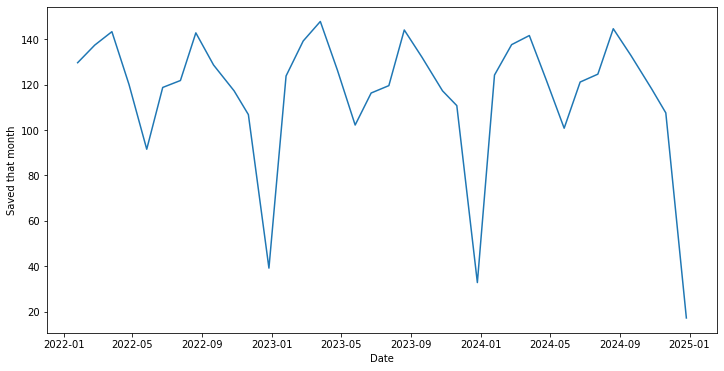

In [51]:
plt.xlabel('Date')
plt.ylabel('Saved that month')
#x = newData['edit_date_savings']

#plotting a graph of monthly leftovers from savings
y = newData['total_left_savings']
plt.plot(y)


In [52]:
x1 = newData['savings_budget']
x2 = newData['month_int']
x3 = newData['savings_used']
x3 = newData['savings_used'] = newData['savings_used'].astype(int)

y = newData['total_left_savings']

import numpy as np
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
y = np.array(y)
x = np.array(x)

#single column reshape
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
x3 = x3.reshape(-1,1)

y = y.reshape(-1,1)
z = np.concatenate((x1, x2, x3), axis = 1)
print(z)
print(y)

[[   165 220125     35]
 [   165 220224     27]
 [   165 220326     21]
 [   132 220425     11]
 [   165 220526     73]
 [   132 220623     13]
 [   132 220724     10]
 [   165 220820     22]
 [   165 220920     36]
 [   132 221026     14]
 [   165 221120     58]
 [   180 221226    140]
 [   165 230125     41]
 [   165 230224     25]
 [   165 230326     17]
 [   132 230425      5]
 [   165 230526     62]
 [   132 230623     15]
 [   132 230724     12]
 [   165 230820     20]
 [   165 230920     32]
 [   132 231026     14]
 [   165 231120     54]
 [   180 231226    147]
 [   165 240125     40]
 [   165 240224     27]
 [   165 240326     23]
 [   132 240425     10]
 [   165 240526     64]
 [   132 240623     10]
 [   132 240724      7]
 [   165 240820     20]
 [   165 240920     32]
 [   132 241026     13]
 [   165 241120     57]
 [   180 241226    162]]
[[129.64]
 [137.4 ]
 [143.3 ]
 [120.01]
 [ 91.55]
 [118.75]
 [121.8 ]
 [142.78]
 [128.64]
 [117.25]
 [106.8 ]
 [ 39.2 ]
 [123.8 ]
 [139

In [53]:
from sklearn.ensemble import RandomForestRegressor
mymodel = RandomForestRegressor(n_estimators=150, max_features=3, random_state=5)

In [54]:
linReg = LinearRegression()
x_train = z[:-24]
x_test = z[-24:]
y_train = y[:-24]
y_test = y[-24:]



In [55]:
mymodel.fit(x_train, np.ravel(y_train))
linReg.fit(x_train, np.ravel(y_train))
linReg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

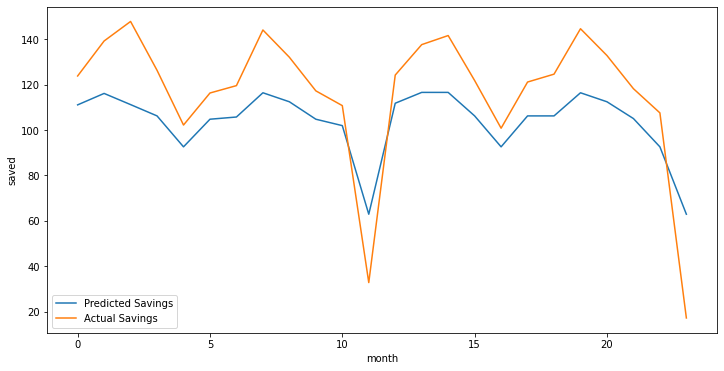

In [56]:
prediction = mymodel.predict(x_test)
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(prediction, label = 'Predicted Savings')
plt.plot(y_test, label = 'Actual Savings')
plt.xlabel('month')
plt.ylabel('saved')
plt.legend(loc = 'lower left')
plt.show()

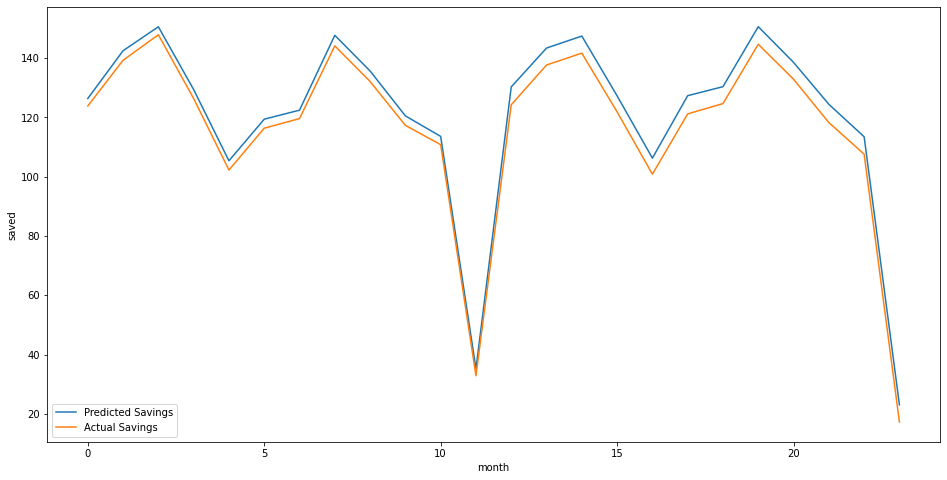

In [57]:
linearPrediction = linReg.predict(x_test)
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (16,8)
plt.plot(linearPrediction, label = 'Predicted Savings')
plt.plot(y_test, label = 'Actual Savings')
plt.xlabel('month')
plt.ylabel('saved')
plt.legend(loc = 'lower left')
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
randForest = sqrt(mean_squared_error(prediction, y_test))
liReg = sqrt(mean_squared_error(linearPrediction, y_test))
print(randForest)
print(liReg)

21.3382988878414
4.624771213960761


In [83]:
#making the date field into datetime and setting it as the index
data['edit_date_savings'] = pd.to_datetime(data['edit_date_savings'], infer_datetime_format=True)
newData = data.set_index(['edit_date_savings'])

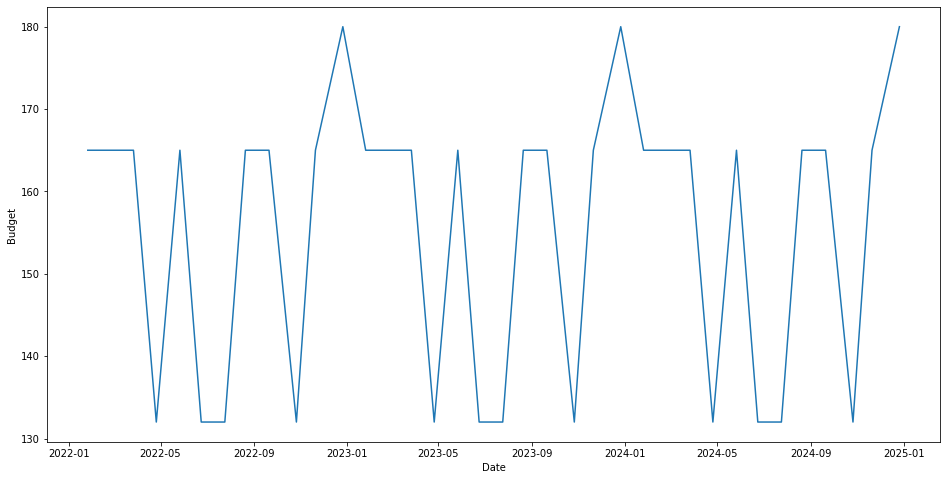

In [87]:
plt.xlabel('Date')
plt.ylabel('Budget')
#x = newData['edit_date_savings']

#plotting a graph of monthly leftovers from savings
y = newData['savings_budget']
plt.plot(y)

In [16]:
import pandas as pd
import matplotlib.pylab as plt
from pandas import DataFrame as df
from matplotlib.pylab import rcParams
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#reading the csv amd ordering by months
dataRead = pd.read_csv(r'C:\Users\mhila\Desktop\estudent_app\3yeardata.csv')
data = dataRead.sort_values('month_int')

In [4]:
print(data)

    user  savings_budget  savings_used edit_date_savings  total_left_savings  \
0     19             165         35.36  25/01/2022 11:00              129.64   
1     19             165         27.60  24/02/2022 11:02              137.40   
2     19             165         21.70  26/03/2022 11:04              143.30   
3     19             132         11.99  25/04/2022 11:05              120.01   
4     19             165         73.45  26/05/2022 11:06               91.55   
5     19             132         13.25  23/06/2022 11:07              118.75   
6     19             132         10.20  24/07/2022 11:08              121.80   
7     19             165         22.22  20/08/2022 11:09              142.78   
8     19             165         36.36  20/09/2022 11:11              128.64   
9     19             132         14.75  26/10/2022 11:11              117.25   
10    19             165         58.20  20/11/2022 11:12              106.80   
11    19             180        140.80  

In [11]:
data['edit_date_savings'] = pd.to_datetime(data['edit_date_savings'], infer_datetime_format=True)
newData = data.set_index(['edit_date_savings'])
newData.head()

,user,savings_budget,savings_used,total_left_savings,month_int
edit_date_savings,,,,,
2022-01-25 11:00:00,19,165,35.36,129.64,220125
2022-02-24 11:02:00,19,165,27.60,137.40,220224
2022-03-26 11:04:00,19,165,21.70,143.30,220326
2022-04-25 11:05:00,19,132,11.99,120.01,220425
2022-05-26 11:06:00,19,165,73.45,91.55,220526


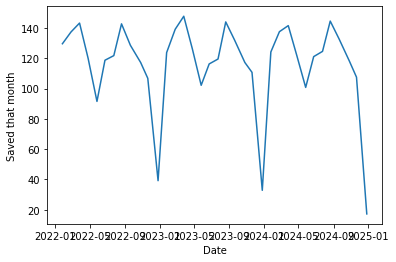

In [12]:
plt.xlabel('Date')
plt.ylabel('Saved that month')
#x = newData['edit_date_savings']

#plotting a graph of monthly leftovers from savings
y = newData['total_left_savings']
plt.plot(y)

In [29]:
x = newData['month_int']

y = newData['total_left_savings']
y = round(y)

import numpy as np
x = np.array(x)
y = np.array(y)


#single column reshape
x = x.reshape(-1,1)
y = y.reshape(-1,1)

print(x)
print(y)

[[220125]
 [220224]
 [220326]
 [220425]
 [220526]
 [220623]
 [220724]
 [220820]
 [220920]
 [221026]
 [221120]
 [221226]
 [230125]
 [230224]
 [230326]
 [230425]
 [230526]
 [230623]
 [230724]
 [230820]
 [230920]
 [231026]
 [231120]
 [231226]
 [240125]
 [240224]
 [240326]
 [240425]
 [240526]
 [240623]
 [240724]
 [240820]
 [240920]
 [241026]
 [241120]
 [241226]]
[[130.]
 [137.]
 [143.]
 [120.]
 [ 92.]
 [119.]
 [122.]
 [143.]
 [129.]
 [117.]
 [107.]
 [ 39.]
 [124.]
 [139.]
 [148.]
 [126.]
 [102.]
 [116.]
 [120.]
 [144.]
 [132.]
 [117.]
 [111.]
 [ 33.]
 [124.]
 [138.]
 [142.]
 [122.]
 [101.]
 [121.]
 [125.]
 [145.]
 [133.]
 [118.]
 [108.]
 [ 17.]]


In [30]:
from sklearn.ensemble import RandomForestRegressor
mymodel = RandomForestRegressor(n_estimators=150, max_features=1, random_state=5)

In [31]:
linReg = LinearRegression()
x_train = x[:-24]
x_test = x[-24:]
y_train = y[:-24]
y_test = y[-24:]

In [32]:
mymodel.fit(x_train, np.ravel(y_train))
linReg.fit(x_train, np.ravel(y_train))
linReg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

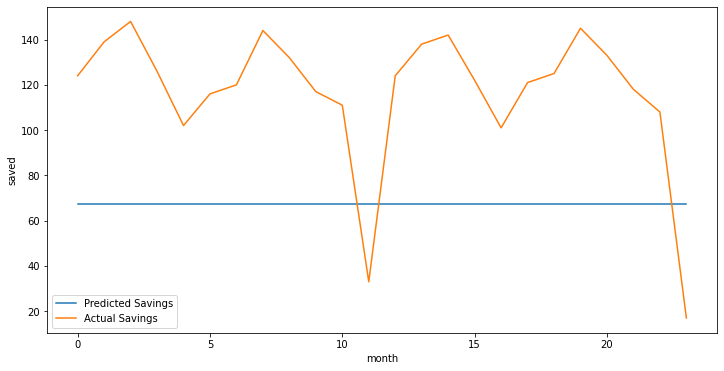

In [35]:
prediction = mymodel.predict(x_test)
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(prediction, label = 'Predicted Savings')
plt.plot(y_test, label = 'Actual Savings')
plt.xlabel('month')
plt.ylabel('saved')
plt.legend(loc = 'lower left')
plt.show()

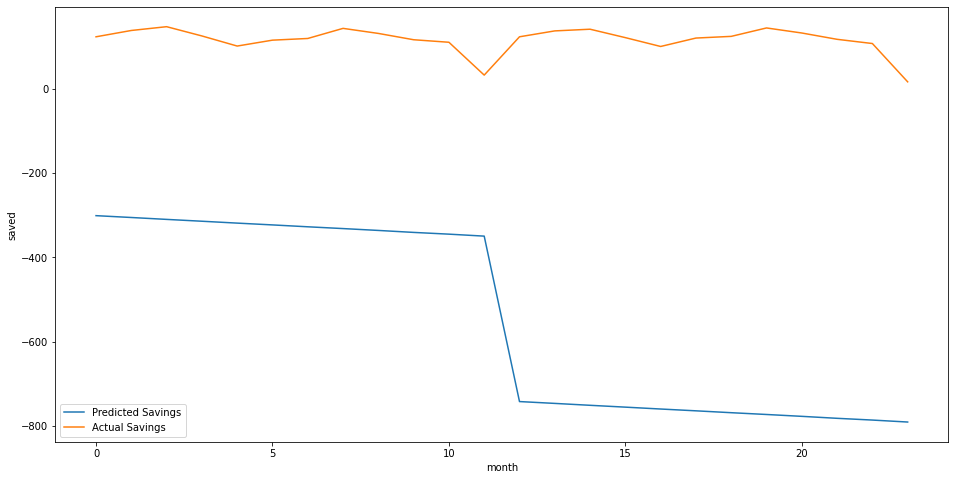

In [34]:
linearPrediction = linReg.predict(x_test)
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (16,8)
plt.plot(linearPrediction, label = 'Predicted Savings')
plt.plot(y_test, label = 'Actual Savings')
plt.xlabel('month')
plt.ylabel('saved')
plt.legend(loc = 'lower left')
plt.show()